<a href="https://colab.research.google.com/github/royal-dit/Coffee-vending-machine/blob/main/colorizing_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import Sequential,Model
# from keras.layers import Conv2D,UpSampling2D,Input
# # from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
# from skimage.transform import resize 
# from skimage.color import rgb2lab,lab2rgb,gray2rgb
# from skimage.io import imsave
# import numpy as np 
# import os

In [ ]:
# from keras.applications.vgg16 import VGG16
# vggmodel = VGG16()
# # model.summary()
# newmodel = Sequential()


In [ ]:
# for i, layer in enumerate(vggmodel.layers):
#   if i<19:
#     newmodel.add(layer)
    
# newmodel.summary()


In [ ]:
# newmodel.trainable=False

In [ ]:
# from google_images_download import google_images_download
# response = google_images_download.googleimagesdownload()
# arguments = {"keywords":"house and nature","limit":60,"print_urls":False}
# paths=response.download(arguments)
# print(paths)

In [ ]:
# path = 'downloads/'
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
# train = train_datagen.flow_from_directory(path,target_size = (224,224),class_mode='categorical')

In [ ]:
# train[2]

In [ ]:
# X=[]
# Y=[]
# for img in train[0]:
#   try:
#     lab = rgb2lab(img)
#     X.append(lab[:,:,0])
#     Y.append(lab[:,:,1:]/128)
#   except:
#     print('error')
# X=np.array(X)
# Y=np.array(Y)
# X=X.reshape(X.shape+(1,))
# # print(X.shape)
# # print(Y.shape)

In [ ]:
# X.shape,Y.shape


In [ ]:
# vggfeatures = []
# for i, sample in enumerate (X):
#   sample = gray2rgb(sample)
#   sample = sample.reshape((1,224,224,3))
#   prediction = newmodel.predict(sample)
#   prediction = prediction.reshape((7,7,512))
#   vggfeatures.append(prediction)
# vggfeatures = np.array(vggfeatures)
# print(vggfeatures.shape)

#autoencoders image colorization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,UpSampling2D,Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab,lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np 
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"house and nature","limit":100,"print_urls":False}
paths=response.download(arguments)
print(paths)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/random images/downloads'
train_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(path,
                                          target_size = (256,256),
                                          # batch_size = 32,
                                          class_mode = None
                                          )

Found 41048 images belonging to 66 classes.


In [ ]:
X=[]
Y=[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) # this is lightness channel
      Y.append(lab[:,:,1:]/128) #this is along x axis in lab
  except:
    print('error')
X = np.array(X)
Y=np.array(Y)
X=X.reshape(X.shape+(1,))



In [ ]:
X.shape

(32, 256, 256, 1)

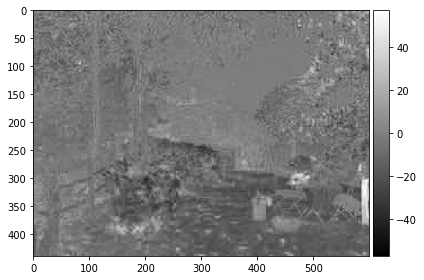

In [ ]:
from skimage.io import imshow
#example
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Colab Notebooks/images/natural_images/combine images/11.house-middle-nature.jpg')
lab = rgb2lab(img)
L = lab[:,:,0]
A = lab[:,:,1]
B = lab[:,:,2]
imshow(A,cmap='gray')

In [ ]:
from tensorflow.python import metrics
model = tf.keras.Sequential([
    #encoder
    tf.keras.layers.Conv2D(64,(3,3),activation='tanh',padding='same',strides=2,input_shape =(256,256,1)),
    tf.keras.layers.Conv2D(128,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(128,(3,3),activation='tanh',padding='same',strides=2),
    tf.keras.layers.Conv2D(256,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='tanh',padding='same',strides=2),
    tf.keras.layers.Conv2D(512,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(512,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='tanh',padding='same'),
    #Decoder
    tf.keras.layers.Conv2D(128,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(16,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(2,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.UpSampling2D((2,2))


])




    





In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='tanh',padding='same',strides=2,input_shape=(256,256,1)),
    tf.keras.layers.Conv2D(128,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(128,(3,3),activation='tanh',padding='same',strides=2),
    tf.keras.layers.Conv2D(256,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='tanh',padding='same',strides=2),
    tf.keras.layers.Conv2D(512,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(512,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='tanh',padding='same'),
#decoder
    tf.keras.layers.Conv2D(128,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(16,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(2,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.UpSampling2D((2,2))
])

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 512)      

In [ ]:
model.fit(X,Y,epochs=50)

Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 0.0909 - accuracy: 0.4185
Epoch 2/50
1/1 [==============================] - 0s 340ms/step - loss: 0.7304 - accuracy: 0.7069
Epoch 3/50
1/1 [==============================] - 0s 341ms/step - loss: 0.9623 - accuracy: 0.6665
Epoch 4/50
1/1 [==============================] - 0s 341ms/step - loss: 0.6277 - accuracy: 0.7072
Epoch 5/50
1/1 [==============================] - 0s 335ms/step - loss: 0.2755 - accuracy: 0.7072
Epoch 6/50
1/1 [==============================] - 0s 335ms/step - loss: 0.0609 - accuracy: 0.7041
Epoch 7/50
1/1 [==============================] - 0s 336ms/step - loss: 0.0465 - accuracy: 0.3300
Epoch 8/50
1/1 [==============================] - 0s 336ms/step - loss: 0.0631 - accuracy: 0.3095
Epoch 9/50
1/1 [==============================] - 0s 332ms/step - loss: 0.0588 - accuracy: 0.3095
Epoch 10/50
1/1 [==============================] - 0s 340ms/step - loss: 0.0336 - accuracy: 0.3096
Epoch 11/50
1/1 [=====

#saving and loading model

In [ ]:
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"blac and white nature image","limit":1,"print_urls":False}
paths=response.download(arguments)
print(paths)


Item no.: 1 --> Item name = blac and white nature image
Evaluating...
Starting Download...
Completed Image ====> 1.photo-1610303871783-491dc6d0a165.jpg

Errors: 0

({'blac and white nature image': ['/content/downloads/blac and white nature image/1.photo-1610303871783-491dc6d0a165.jpg']}, 0)


In [ ]:
model.save('colorize_autoencoder.model')

In [ ]:
model = tf.keras.models.load_model('colorize_autoencoder.model',custom_objects=None,compile=True)


In [ ]:
from keras.utils.image_utils import img_to_array
img1_color = []
img1=img_to_array(tf.keras.preprocessing.image.load_img('/content/human face grayscale.jpg'))
img1=resize(img1,(256,256))
img1_color.append(img1)



img1_color = np.array(img1_color,dtype = float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1=output1*128

result = np.zeros((256,256,3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:]=output1[0]
plt.imshow(lab2rgb(result))
imsave("result.jpg",lab2rgb(result))


1/1 [==============================] - 1s 724ms/step


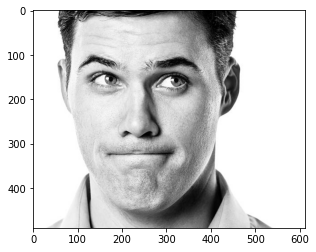

In [ ]:
import matplotlib.pyplot as plt
img1=tf.keras.preprocessing.image.load_img('/content/human face grayscale.jpg')
plt.imshow(img1)
